<a href="https://colab.research.google.com/github/sijuswamy/Mathematics-For-Machine-Learning/blob/main/coin_flip_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling `Coin-flip` problem as a Bayesian

The algorithm contain three steps

**Step 1:** Create likelihood distribution

**Step 2:** Create prior distribution

**Step 3** Create the posterior and sample them for visualization

## Step 1: Creating likelihood distribution
$$B(y,\theta,N)=\binom  N y \theta^y(1-\theta)^{(N-y)}$$

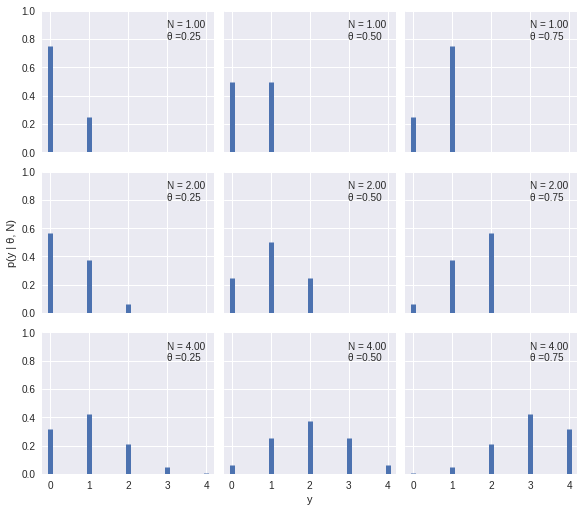

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn')
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success
x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True,
sharey=True,
figsize=(8, 7), constrained_layout=True)
for i in range(len(n_params)):
  for j in range(len(p_params)):
    n = n_params[i]
    p = p_params[j]
    y = stats.binom(n=n, p=p).pmf(x) #selecting liklihood distribution
    ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
    ax[i,j].set_ylim(0, 1)
    ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ ={:3.2f}".format(n,p), alpha=0)
    ax[i,j].legend()
    ax[2,1].set_xlabel('y')
    ax[1,0].set_ylabel('p(y | θ, N)')
    ax[0,0].set_xticks(x)

## Step 2: Choosing Prior

$$Beta(\alpha,\beta)=\dfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{(\alpha-1)}(1-\theta)^{(\beta-1)}$$

Text(0.07, 0.5, 'p(θ)')

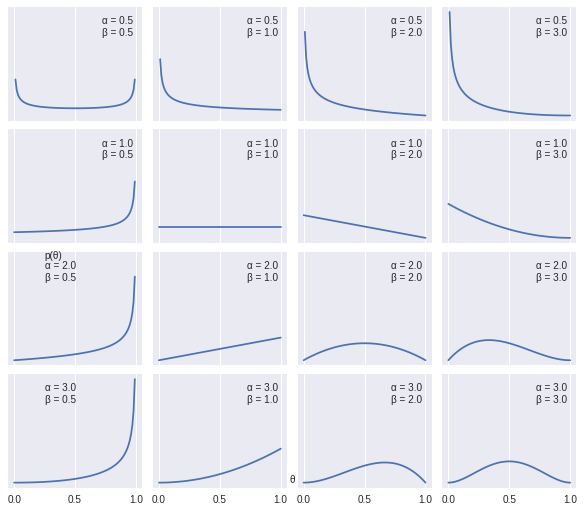

In [ ]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True,sharey=True,figsize=(8, 7), constrained_layout=True)
for i in range(4):
  for j in range(4):
    a = params[i]
    b = params[j]
    y = stats.beta(a, b).pdf(x)# selecting prior distribution
    ax[i,j].plot(x, y)
    ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,b), alpha=0)
    ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

##Step 3: Creating Posterior using Bayes theorem

$$\begin{align*}
P(y|\theta)&\propto P(\theta|y)P(\theta)\\
&=\text{Likelihood}\times \text{Prior}\\
&=\binom N y\theta^y(1-\theta)^{(N-y)}\times \dfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{(\alpha-1)}(1-\theta)^{(\beta-1)}\\
&\propto \theta^{(\alpha-1+y)}(1-\theta)^{(\beta-1+N-y)}\\
&=Beta(\alpha_{prior}+y,\beta_{Prior}+N-y)\\
\implies P(y|\theta)&\propto Beta(\alpha_{prior}+y,\beta_{Prior}+N-y)
\end{align*}$$


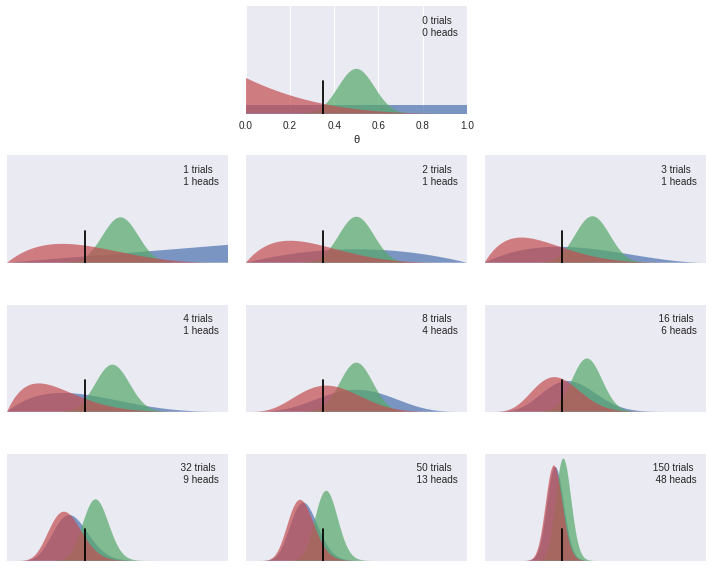

<Figure size 576x396 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials):
  if idx == 0:
    plt.subplot(4, 3, 2)
    plt.xlabel('θ')
  else:
    plt.subplot(4, 3, idx+3)
    plt.xticks([])
  y = data[idx]
  for (a_prior, b_prior) in beta_params:
    p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)## creating Bayesian posterior
    plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
  plt.axvline(theta_real, ymax=0.3, color='k')
  plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
  plt.xlim(0, 1)
  plt.ylim(0, 12)
  plt.legend()
  plt.yticks([])
plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('posterior.png', dpi=100)

## Summary

1. In this Bayesian model, we have used three beta priors priors
2. So each posterior is considerd as a mixture of three priors weighted with a Binomial likelihood

3. Most of the posterior can be modelled as mixture of suitable priors

4. The uniform (blue) prior. This represent all the possible values for the bias being
equally probable a priori.
5. The Gaussian-like (red) prior is centered and concentrated around 0.5, so this
prior is compatible with information indicating that the coin has more or less
about the same chance of landing heads or tails. We could also say this prior is
compatible with the belief that most coins are fair. While belief is commonly used
in Bayesian discussions, we think is better to talk about models and parameters
that are informed by data.
6. The skewed (green) prior puts the most weight on a tail-biased outcome.

7. The rest of the subplots show posterior distributions for successive trials. The number of
trials (or coin tosses) and the number of heads are indicated in each subplot's legend. There
is also a black vertical line at 0.35 representing the true value for . Of course, in real
problems, we do not know this value, and it is here just for pedagogical reasons. This figure
can teach us a lot about Bayesian analysis


let's take a moment to understand it:

## Takeaway

- The result of a Bayesian analysis is a posterior distribution, not a single value but
a distribution of plausible values given the data and our model.
- The most probable value is given by the mode of the posterior (the peak of the
distribution).
- The spread of the posterior is proportional to the uncertainty about the value of a
parameter; the more spread out the distribution, the less certain we are.
- Intuitively, we are more confident in a result when we have observed more data
supporting that result. Thus, even when numerically , seeing four heads
out of eight trials gives us more confidence that the bias is 0.5 than observing one
head out of two trials. This intuition is reflected in the posterior, as you can check
for yourself if you pay attention to the (blue) posterior in the third and sixth
subplots; while the mode is the same, the spread (uncertainty) is larger in the
third subplot than in the sixth subplot.
- Given a sufficiently large amount of data, two or more Bayesian models with
different priors will tend to converge to the same result. In the limit of infinite
data, no matter which prior we use, all of them will provide the same posterior.
- Remember that infinite is a limit and not a number, so from a practical point of
view, we could get practically indistinguishably posteriors for a finite and rather
small number of data points.
- How fast posteriors converge to the same distribution depends on the data and
the model. In the preceding figure, we can see that the posteriors coming from
the blue prior (uniform) and green prior (biased towards tails) converge faster to
almost the same distribution, while it takes longer for the orange posterior (the one
coming from the concentrated prior). In fact, even after 150 trials, it is somehow
easy to recognize the orange posterior as a different distribution from the two
others.
- Something not obvious from the figure is that we will get the same result if we
update the posterior sequentially than if we do it all at once. We can compute the
posterior 150 times, each time adding one more observation and using the
obtained posterior as the new prior, or we can just compute one posterior for the
150 tosses at once. The result will be exactly the same. This feature not only
makes perfect sense, it also leads to a natural way of updating our estimations
when we get new data, a situation common in many data-analysis problems.